# CAPTCHA Identification Using CNN
The text in the document by < Zhixin Wang, Jiamin Shang > is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/<br>
The code in the document by < Zhixin Wang, Jiamin Shang > is licensed under the MIT License https://opensource.org/licenses/MIT

This study attempts to identify different forms of captcha. Our dataset has two categories, one is popular digital CAPTCHA, the other is picture CAPACHA. The ultimate goal is to make our model can identify the content correctly when given a certain type of captcha. Grey process, size normalization will be conducted on the raw data, we used convolutional neural network as our training model and identified test CAPTCHA by the model we generated. Our test data indicated that CNN model has a good performance, the accuracy is over 90%.

## Motivation & Background
Image processing techniques have been applied increasingly is recent years. Self driving would
be the representative one, autos can deal with different scenarios because they have already
been training after learning different patterns, what is a signal, how to judge if another vehicle
is too close to hit you. So we want to know the performance of image recognition, how
accurate it can be, how sensitive it could be to different images. In addition, our project can let
us understand how machine learning techniques help build the architecture of image
recognition.

## Algorithm CNN
Convolutional neural network is very similar to the ordinary Deep Neural Network, they are made up of neurons that have learnable weights and biases. Each neuron receives some inputs, and produces non-linearity output. And they still have a loss function on the last (fully-connected) layer and all the tips/tricks we developed for learning regular Neural Networks still apply. 
<img src="./data/img/cnn1.jpg" width="100%">
The whole network is different at ConvNet and MaxPoolNet, which is designed for input that have too many dimensions,30\*30 image would have 30\*30\*3 dimensions input. ConvNet would use a small local receptive field to scan the input which is be able to reduce the dimensions to save time and resource to train our model. And MaxPoolNet is like to calculate the value from the feature map that we got from last layer, the method maybe the maximum value of ConvNet output or average value of it.
<img src="./data/img/cnn2.jpg" width="100%">

## Install the library by anaconda or pip
## Install the openCV(cv2)
### If pip works
    * pip install opencv-python
### if pip not work, For Windows
    * Goto https://www.lfd.uci.edu/~gohlke/pythonlibs/ download the suitable version
    * I use opencv_python‑3.4.1‑cp36‑cp36m‑win_amd64.whl
    * Goto the folder the whl put, use command pip install opencv_python‑3.4.1‑cp36‑cp36m‑win_amd64.whl
### if pip not work, For Mac
    * conda install -c conda-forge opencv

In [23]:
import urllib3
import unicodedata
import datetime
import os
import numpy as np
import cv2
from bs4 import BeautifulSoup, SoupStrainer, Comment
import matplotlib.pyplot as plt
import warnings
import requests
import random
import tensorflow as tf
import pandas as pd
from sklearn.cross_validation import train_test_split
import sys
warnings.filterwarnings('ignore')

### Define method to download digital captcha from website
We use urllib3 to get the response and extract the image data

In [2]:
def downloads_pic():

    urls='http://health.sxws.gov.cn/yypt/login_code.html?r=15208203772030.5898448258753444'
    http = urllib3.PoolManager()
    response = http.request('GET',urls)
    with open('./data/origindown/'+str(random.randint(00000000,99999999))+'.bmp', 'wb') as f:
        f.write(response.data)
        f.flush()
        f.close()

### Define read_img method
    * to read image set from disk 
    * resize the images 
    * convert images to grayscale images
    * convert grayscale images to black-white binary image (reduce noise)
    * split one number captcha into 4 individual digital images
    * add these 4 child images to input list
    * return image list

In [3]:
def read_img(path_name,trigger):
    images = []
    for dir_item in os.listdir(path_name):
        
        full_path = os.path.abspath(os.path.join(path_name, dir_item))
        
        if os.path.isdir(full_path): 
            read_path(full_path)
        else:   
            if dir_item.endswith('.bmp'):
                image = cv2.imread(full_path)
                image = cv2.resize(image, (70, 16), interpolation=cv2.INTER_NEAREST)
                
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY );
                ret,image=cv2.threshold(image,127,255,cv2.THRESH_BINARY) 
                
                imagex1 = []
                imagex2 = []
                imagex3 = []
                imagex4 = []
                image1 = image[0:16,4:20]
                image2 = image[0:16,20:36]
                image3 = image[0:16,35:51]
                image4 = image[0:16,51:67]
                if trigger == 1:
                    cv2.imwrite('./data/down/'+str(random.randint(00000000,99999999))+'.png',image1)
                    cv2.imwrite('./data/down/'+str(random.randint(00000000,99999999))+'.png',image2)
                    cv2.imwrite('./data/down/'+str(random.randint(00000000,99999999))+'.png',image3)
                    cv2.imwrite('./data/down/'+str(random.randint(00000000,99999999))+'.png',image4)
                for img in image1:
                    imagex1.extend(img)
                for img in image2:
                    imagex2.extend(img)
                for img in image3:
                    imagex3.extend(img)
                for img in image4:
                    imagex4.extend(img)
                images.append(imagex1)
                images.append(imagex2)
                images.append(imagex3)
                images.append(imagex4)                              
                    
    return images

### Download digital captcha and split them into 4 individual digital images

In [5]:
download_quantity = 1
for i in range(download_quantity):
    downloads_pic()

In [ ]:
process_captcha = np.array(read_img("./data/origindown",1))

### Define read_path method
    * to read image set from disk 
    * resize the images 
    * convert images to grayscale images
    * return image and category label list

In [6]:
def read_path(path_name,IMAGE_SIZE):
    images = []
    labels = []
    for dir_item in os.listdir(path_name):
        
        full_path = os.path.abspath(os.path.join(path_name, dir_item))
        
        if os.path.isdir(full_path):
            read_path(full_path)
        else:   
            if dir_item.endswith('.png') or dir_item.endswith('.jpg'):
                image = cv2.imread(full_path)
                image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_NEAREST)
                
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY );
                
                imagex = []
                for img in image:
                    imagex.extend(img)
                images.append(imagex)                
                labels.append(path_name)                                
                    
    return images,labels

### Define initialization method
    * weight and bias for every layer
    * ConvNet 
    * MaxpoolNet 
### this part will be used to build network
Then we defined the parameters that used for the training of neural network, and the ConvNet and MaxpoolNet function, we will use a 2*2 receptive field to scan the whole 16 dimensions  input and the stride is 1,  then we take the maximum value of receptive field before we send it to the activation function.

In [7]:
def weight_variable(shape,stddev):
    initial = tf.truncated_normal(shape, stddev=stddev) # 变量的初始值为截断正太分布
    return tf.Variable(initial)

def bias_variable(shape,stddev):
    initial = tf.constant(stddev, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    """
    we will use a 2*2 receptive field to scan the whole 256 dimensions, input and the stride is 1
    """
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    """
    we take the maximum value of receptive field before we send it to the activation function.
    """
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')  

## Build the neural network
### Initialize the placeholder
    * inputdata
    * outputdata
    * dropout variable to avoid the overfitting situation
### Implement layers
    * three hidden layers
    * Softmax as the classification activation function
The third part of our work is to build the architecture of our neural network. We implemented
three hidden layers in the network, for example, in the first hidden layer, we used 8*8 patch to
calculate 32 features, 1 means the input channel and 32 means the output channel, 0.01 is the
parameter for the initialization of weights. In addition, we set the dropout variable to avoid the
overfitting situation.

In [8]:
g1 = tf.Graph()
g2 = tf.Graph()

### For picture indentify model

In [9]:
with g1.as_default():
    X = tf.placeholder("float", [None, 1600])
    Y = tf.placeholder("float", [None, 6])

    x_image = tf.reshape(X, [-1,40,40,1])

    W_conv1 = weight_variable([8, 8, 1, 32],0.01)  
    # we used 2*2 patch to calculate 6 features, 1 means the input channel and 6 means the output channel
    # 0.01 is the parameter for the initialization of weights
    b_conv1 = bias_variable([32],0.01)
    h_conv1 = tf.nn.elu(conv2d(x_image, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)

    W_conv2 = weight_variable([8, 8, 32, 64],0.01)
    b_conv2 = bias_variable([64],0.01)
    h_conv2 = tf.nn.elu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)

    W_conv3 = weight_variable([8, 8, 64, 64],0.01)
    b_conv3 = bias_variable([64],0.01)
    h_conv3 = tf.nn.elu(conv2d(h_pool2, W_conv3) + b_conv3)
    h_pool3 = max_pool_2x2(h_conv2)

    W_fc1 = weight_variable([10 * 10 * 64, 1024],0.01)
    b_fc1 = bias_variable([1024],0.01)
    h_pool2_flat = tf.reshape(h_pool3, [-1, 10*10*64])
    h_fc1 = tf.nn.elu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    keep_prob = tf.placeholder(tf.float32) 
    # we set the dropout variable to avoid the overfitting situation
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

    W_fc2 = weight_variable([1024, 6],0.01)
    b_fc2 = bias_variable([6],0.01)

    y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

### For digital captcha indentify model

In [10]:
with g2.as_default():
    DX = tf.placeholder("float", [None, 256])
    DY = tf.placeholder("float", [None, 10])

    Dx_image = tf.reshape(DX, [-1,16,16,1])

    DW_conv1 = weight_variable([4, 4, 1, 8],0.01) 
    # we used 2*2 patch to calculate 6 features, 1 means the input channel and 6 means the output channel
    # 0.01 is the parameter for the initialization of weights
    Db_conv1 = bias_variable([8],0.01)
    Dh_conv1 = tf.nn.elu(conv2d(Dx_image, DW_conv1) + Db_conv1)
    Dh_pool1 = max_pool_2x2(Dh_conv1)

    DW_conv2 = weight_variable([4, 4, 8, 16],0.01)
    Db_conv2 = bias_variable([16],0.01)
    Dh_conv2 = tf.nn.elu(conv2d(Dh_pool1, DW_conv2) + Db_conv2)
    Dh_pool2 = max_pool_2x2(Dh_conv2)

    DW_conv3 = weight_variable([4, 4, 16, 16],0.01)
    Db_conv3 = bias_variable([16],0.01)
    Dh_conv3 = tf.nn.elu(conv2d(Dh_pool2, DW_conv3) + Db_conv3)
    Dh_pool3 = max_pool_2x2(Dh_conv2)

    DW_fc1 = weight_variable([4 * 4 * 16, 64],0.01)
    Db_fc1 = bias_variable([64],0.01)
    Dh_pool2_flat = tf.reshape(Dh_pool3, [-1, 4*4*16])
    Dh_fc1 = tf.nn.elu(tf.matmul(Dh_pool2_flat, DW_fc1) + Db_fc1)

    Dkeep_prob = tf.placeholder(tf.float32) 
    # we set the dropout variable to avoid the overfitting situation
    Dh_fc1_drop = tf.nn.dropout(Dh_fc1, Dkeep_prob)

    DW_fc2 = weight_variable([64, 10],0.01)
    Db_fc2 = bias_variable([10],0.01)

    Dy_conv=tf.nn.softmax(tf.matmul(Dh_fc1_drop, DW_fc2) + Db_fc2)

### Define the model
    * Cross entropy as the loss function
    * AdmaOptimizer as the gradient estimation function
    * define correct_prediction to calculate the accuracy
    * define prediction to predict the voice's gender

### For picture indentify model
In the fourth part, we used Softmax as the classification activation function, cross entropy as
the loss function , AdmaOptimizer as the gradient estimation function and built a function to
record the accuracy of our training model.

In [11]:
with g1.as_default():
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y_conv), reduction_indices=[1]))
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
    correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(Y,1)) 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    prediction = tf.argmax(y_conv,1)

### For digital captcha indentify model

In [12]:
with g2.as_default():    
    Dcross_entropy = tf.reduce_mean(-tf.reduce_sum(DY * tf.log(Dy_conv), reduction_indices=[1]))
    Dtrain_step = tf.train.AdamOptimizer(1e-4).minimize(Dcross_entropy)
    Dcorrect_prediction = tf.equal(tf.argmax(Dy_conv,1), tf.argmax(DY,1)) 
    Daccuracy = tf.reduce_mean(tf.cast(Dcorrect_prediction, tf.float32))
    Dprediction = tf.argmax(Dy_conv,1)

### Define load_dataset method
    * Invoke read_path method 
    * Map category label to 0,1 set label 
    * return image and 0,1 label list

In [13]:
def load_dataset(path_name, input_type):
    images = []
    labels = []
    result = []
    if input_type.endswith('picture'):
        images,labels = read_path(path_name,40)
        for label in labels:
            if label.endswith('camera'):
                result.append([1,0,0,0,0,0,])
            elif label.endswith('lotus'):
                result.append([0,1,0,0,0,0])
            elif label.endswith('watch'):
                result.append([0,0,1,0,0,0])
            elif label.endswith('umbrella'):
                result.append([0,0,0,1,0,0])
            elif label.endswith('sunflower'):
                result.append([0,0,0,0,1,0])
            elif label.endswith('scissors'):
                result.append([0,0,0,0,0,1])
    elif input_type.endswith('digital'):
        images,labels = read_path(path_name,16)
        for label in labels:
            if label.endswith('0'):
                result.append([1,0,0,0,0,0,0,0,0,0])
            elif label.endswith('1'):
                result.append([0,1,0,0,0,0,0,0,0,0])
            elif label.endswith('2'):
                result.append([0,0,1,0,0,0,0,0,0,0])
            elif label.endswith('3'):
                result.append([0,0,0,1,0,0,0,0,0,0])
            elif label.endswith('4'):
                result.append([0,0,0,0,1,0,0,0,0,0])
            elif label.endswith('5'):
                result.append([0,0,0,0,0,1,0,0,0,0])
            elif label.endswith('6'):
                result.append([0,0,0,0,0,0,1,0,0,0])
            elif label.endswith('7'):
                result.append([0,0,0,0,0,0,0,1,0,0])
            elif label.endswith('8'):
                result.append([0,0,0,0,0,0,0,0,1,0])
            elif label.endswith('9'):
                result.append([0,0,0,0,0,0,0,0,0,1])
    return images, result

### Define outputres method
    * Convert results back to category label 
    * return category result list

In [14]:
def outputres(reslist):
    #labels = [[0,1] if label.endswith('camera') else [1,0] for label in labels]
    result = []
    for res in reslist:
        if res == 0:
            result.append('camera')
        elif res == 1:
            result.append('lotus')
        elif res == 2:
            result.append('watch')
        elif res == 3:
            result.append('umbrella')
        elif res == 4:
            result.append('sunflower')
        elif res == 5:
            result.append('scissors')
            
    return result

### Load Dataset and Data preprocess
This step is to load dataset, our dataset contains digital captcha and picture captcha, which
would have a little bit different in data preprocessing. In the digital captcha part, we would
segment the four-digital captcha into four parts and the label would 0~9, for the picture
captcha, we would just label them with the category they belong to.

In [15]:
images, labels = load_dataset("./data/ObjectCategories/camera","picture")
imagesx, labelsx = load_dataset("./data/ObjectCategories/lotus","picture")
images.extend(imagesx)
labels.extend(labelsx)
imagesx, labelsx = load_dataset("./data/ObjectCategories/watch","picture")
images.extend(imagesx)
labels.extend(labelsx)
imagesx, labelsx = load_dataset("./data/ObjectCategories/umbrella","picture")
images.extend(imagesx)
labels.extend(labelsx)
imagesx, labelsx = load_dataset("./data/ObjectCategories/sunflower","picture")
images.extend(imagesx)
labels.extend(labelsx)
imagesx, labelsx = load_dataset("./data/ObjectCategories/scissors","picture")
images.extend(imagesx)
labels.extend(labelsx)

digitals, dlabels = load_dataset("./data/down/0","digital")
digitalsx, dlabelsx = load_dataset("./data/down/1","digital")
digitals.extend(digitalsx)
dlabels.extend(dlabelsx)
digitalsx, dlabelsx = load_dataset("./data/down/2","digital")
digitals.extend(digitalsx)
dlabels.extend(dlabelsx)
digitalsx, dlabelsx = load_dataset("./data/down/3","digital")
digitals.extend(digitalsx)
dlabels.extend(dlabelsx)
digitalsx, dlabelsx = load_dataset("./data/down/4","digital")
digitals.extend(digitalsx)
dlabels.extend(dlabelsx)
digitalsx, dlabelsx = load_dataset("./data/down/5","digital")
digitals.extend(digitalsx)
dlabels.extend(dlabelsx)
digitalsx, dlabelsx = load_dataset("./data/down/6","digital")
digitals.extend(digitalsx)
dlabels.extend(dlabelsx)
digitalsx, dlabelsx = load_dataset("./data/down/7","digital")
digitals.extend(digitalsx)
dlabels.extend(dlabelsx)
digitalsx, dlabelsx = load_dataset("./data/down/8","digital")
digitals.extend(digitalsx)
dlabels.extend(dlabelsx)
digitalsx, dlabelsx = load_dataset("./data/down/9","digital")
digitals.extend(digitalsx)
dlabels.extend(dlabelsx)
digitals = np.array(digitals)
dlabels = np.array(dlabels)

In [16]:
train_images, valid_images, train_labels, valid_labels = train_test_split(images, labels, test_size = 0.1, random_state = random.randint(0, 100)) 
train_digitals, valid_digitals, train_dlabels, valid_dlabels = train_test_split(digitals, dlabels, test_size = 0.1, random_state = random.randint(0, 100)) 

In [17]:
training_epochs_image = 61
training_epochs_digital = 21

### Initialize tensorflow train model
    * start a tensorflow session
    * Initialize all tensorflow variables
    * run the train model and record the accuracy
Finally , the main function is to launch the project work and get the output of our program,
predict fucntion reflects the fact that when digital captcha and picture captcha go through the
training model, whether our model can show the content of captcha correctly.

In [18]:
sess1 = tf.Session(graph=g1)
with g1.as_default():
    init1 = tf.global_variables_initializer()
    init1.run(session=sess1)
sess2 = tf.Session(graph=g2)
with g2.as_default():
    init2 = tf.global_variables_initializer()
    init2.run(session=sess2)
picepoch = []
picaccuracy = []
digitalepoch = []
digitalaccuracy = []

### For picture indentify model

In [19]:
for i in range(training_epochs_image):
    for start, end in zip(range(0, len(train_images), 30), range(30, len(train_images), 30)):
        train_step.run(session=sess1,feed_dict={X: train_images[start:end], Y: train_labels[start:end], keep_prob: 0.5})
        
    picepoch.append(i)
    picaccuracy.append(accuracy.eval(session=sess1,feed_dict={X: valid_images, Y: valid_labels, keep_prob: 1.0}))


### For digital captcha indentify model

In [20]:
for i in range(training_epochs_digital):
    for start, end in zip(range(0, len(train_digitals), 30), range(30, len(train_digitals), 30)):
        Dtrain_step.run(session=sess2,feed_dict={DX: train_digitals[start:end], DY: train_dlabels[start:end], Dkeep_prob: 0.5})
        
    digitalepoch.append(i)
    digitalaccuracy.append(Daccuracy.eval(session=sess2,feed_dict={DX: valid_digitals, DY: valid_dlabels, Dkeep_prob: 1.0}))


In [21]:
picres = {'epoch':picepoch,'accuracy':picaccuracy}
digitalres = {'epoch':digitalepoch,'accuracy':digitalaccuracy}

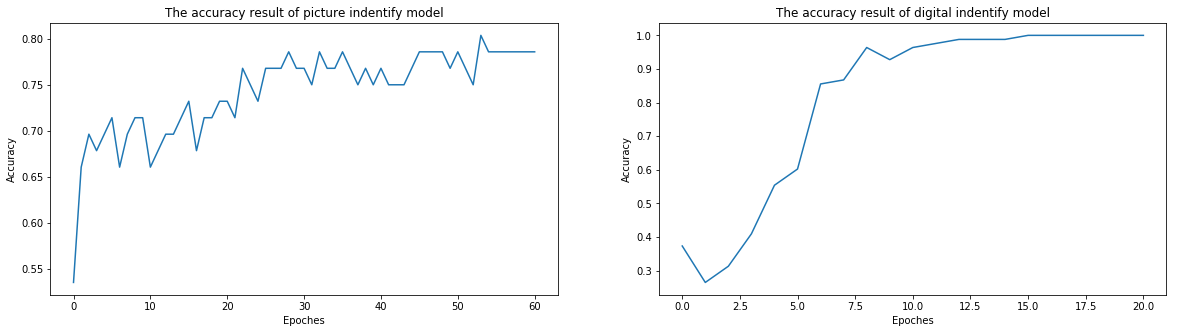

In [39]:
df1 = pd.DataFrame(picres)
df2 = pd.DataFrame(digitalres)
fig = plt.figure()
plt.rcParams['figure.figsize'] = (20, 5)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(df1['epoch'], df1['accuracy'])
ax1.set_xlabel('Epoches')
ax1.set_ylabel('Accuracy')
ax1.set_title('The accuracy result of picture indentify model')
ax2.plot(df2['epoch'], df2['accuracy'])
ax2.set_title('The accuracy result of digital indentify model')
ax2.set_xlabel('Epoches')
ax2.set_ylabel('Accuracy')
plt.show()

### Read the picture data

In [62]:
imaget, labels = load_dataset("./data/preimg","picture")
imaget = np.array(imaget)

### Use the trained model to recognize the picture captcha

<img style="float:left" src="./data/img/imginput.jpg" width="100%">

In [64]:
predict = sess1.run(prediction,feed_dict={X: imaget,keep_prob: 1.0})
print(outputres(predict))

['watch', 'camera', 'sunflower', 'watch', 'sunflower', 'camera']


### Read the digital chatcha data

In [66]:
targetimg = np.array(read_img("./data/preimg",0))
targetimg.shape

(4, 256)

### Use the trained model to recognize the digital captcha

digit captcha input<img style="float:left" src="./data/img/imginput2.bmp" width="10%">

In [68]:
Dpredict = sess2.run(Dprediction,feed_dict={DX: targetimg,Dkeep_prob: 1.0})
print(Dpredict)

[9 1 4 1]


## Conclusion
The whole process of this machine learning project is truly interesting. Basically, it proves that our hypothesis is correct , convolutional neural network has an adequate feedback. Our CNN model’s accuracy is around 90%, we test it with real digital CAPTCHA and pictures, it can recognize the content successfully.
This project also helps us go through the neural network model and many details. Convolutional neural network is suitable for the case that input contains too many dimensions, after the implement of convolution layer and max pool layer, the model would become more concise and readable. 
During our implementation of this project, we put a lot of effort into the improvement of model accuracy. We tried to reshape image in different size, change the network architecture, loss function, activation function, gradient estimation and parameter initialization, as a result, 4-5 hidden layers, cross entropy and Relu activation function, AdamOptimizer, Gaussian initialization serves as the best combinations in our test. This result also proves that our reasoning is supported by our test result.
In the end, the data we collected are some pictures and they are highly similar to each other, which made our model fit for some certain styles picture, in the future scope, we want to collect more different pictures as input to make our model more reliable.

## License 
The text in the document by < Zhixin Wang, Jiamin Shang > is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/<br>
The code in the document by < Zhixin Wang, Jiamin Shang > is licensed under the MIT License https://opensource.org/licenses/MIT

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

## Reference
* Convolutional Neural Network for Visual Recognition:
http://cs231n.github.io/convolutional-networks/

* Image Segmentation: http://www.cnblogs.com/subconscious/p/4660952.html

* Stanford University CS231n: Convolutional Neural Networks for Visual Recognition:
http://cs231n.stanford.edu/project.html

* CIFAR-10 - Object Recognition in Images: https://www.kaggle.com/c/cifar-10

* ImageNet Classification with Deep Convolutional Neural Networks. Alex Krizhevsky. 2017